In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
train=pd.read_excel('/content/cust_data.xlsx')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
train['Gender']=np.where(train['Gender'].isna(),train['Gender'].mode(dropna=True)[0],train['Gender'])


KeyError: "['Cust_ID'] not found in axis"

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  30000 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
train.drop(['Cust_ID'], axis = 1, inplace = True)

In [ ]:
train.describe()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.174067,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900,0.999367
std,0.379173,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915,0.816898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000,2.000000


In [ ]:
le=LabelEncoder()
train['Gender']=le.fit_transform(train['Gender'])

In [ ]:
train.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0


<Axes: >

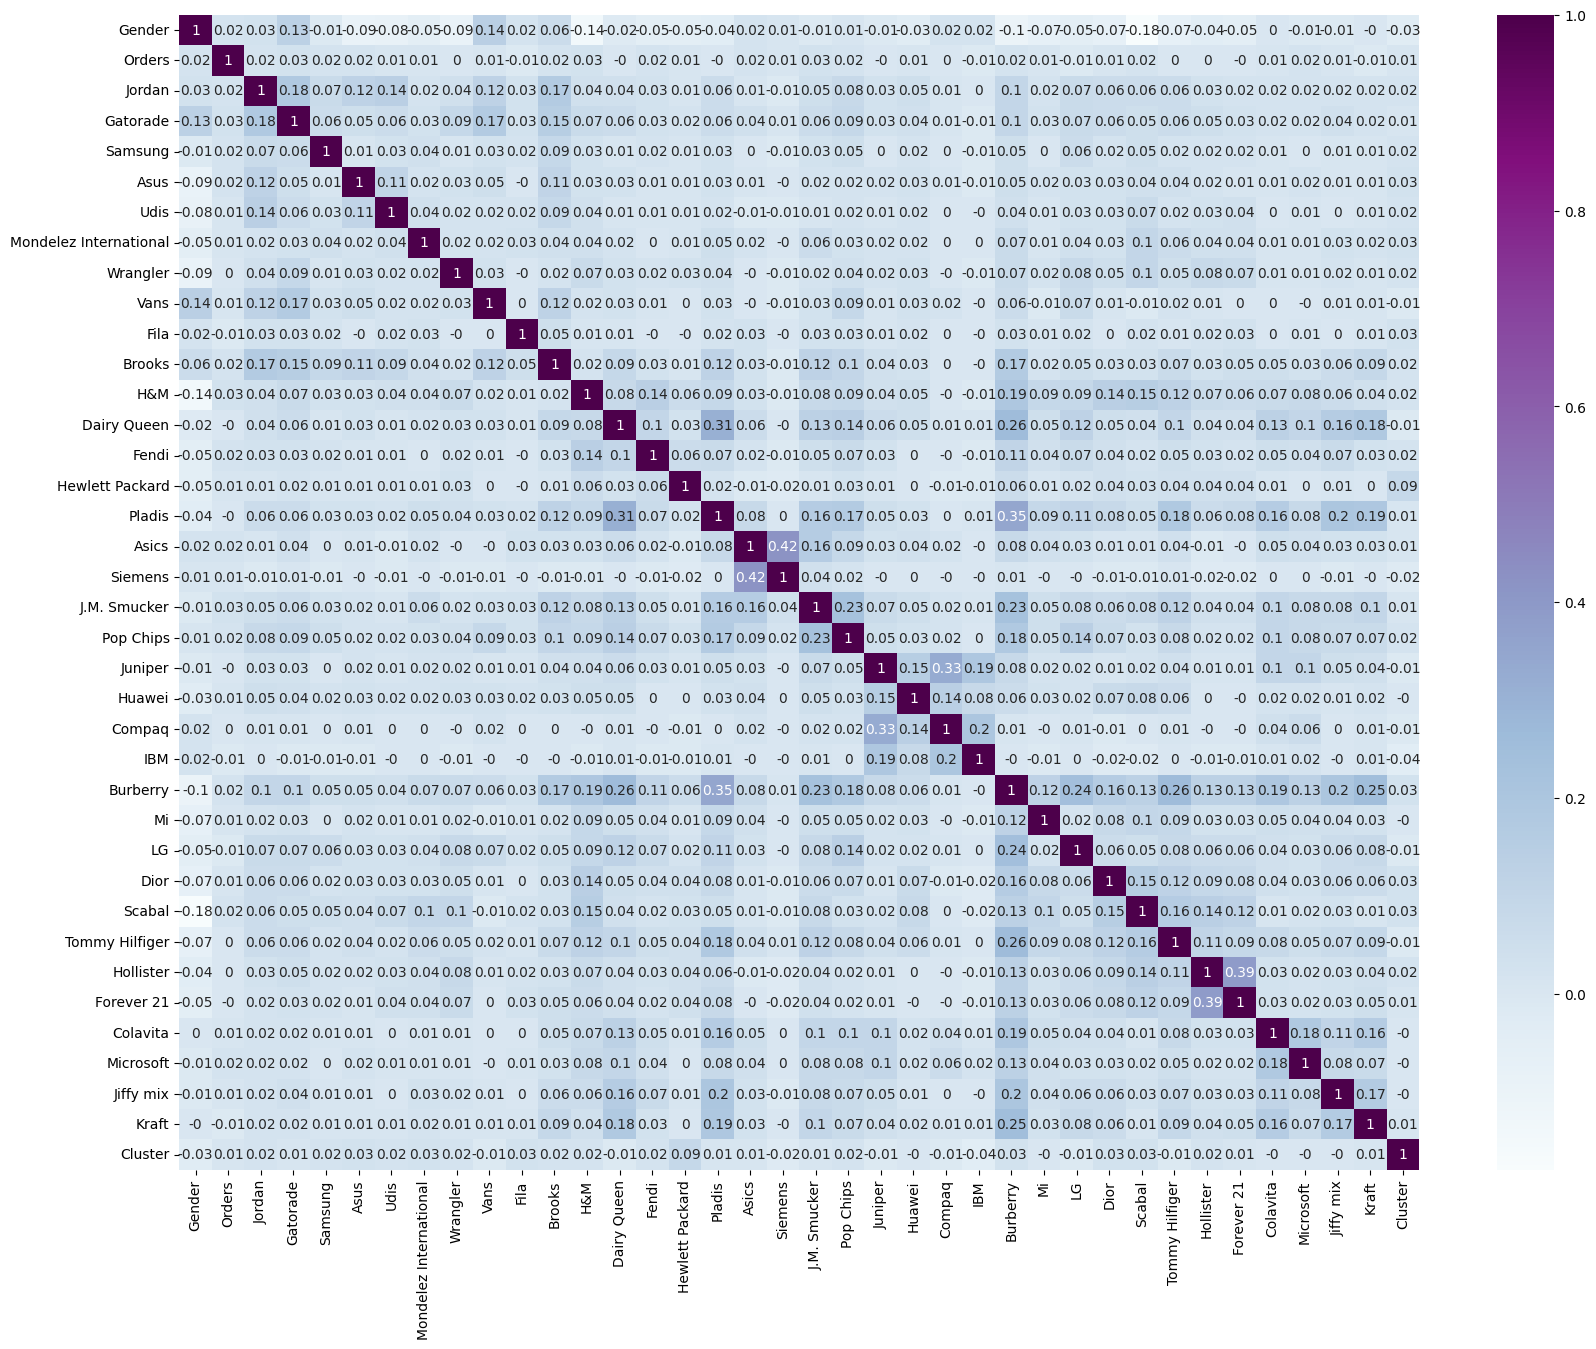

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(round(train.corr(),2), annot=True, cmap='BuPu')

apply cluster to the data

In [ ]:
inertia=[]
for i in range(1,12):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(train)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
inertia

[942825.4533333303,
 640915.4888787572,
 592569.6094040058,
 567384.8982733194,
 547587.2963740393,
 531504.058853261,
 516834.9169840247,
 506728.15813734906,
 495637.19990074635,
 489014.2831940674,
 478402.8355846765]

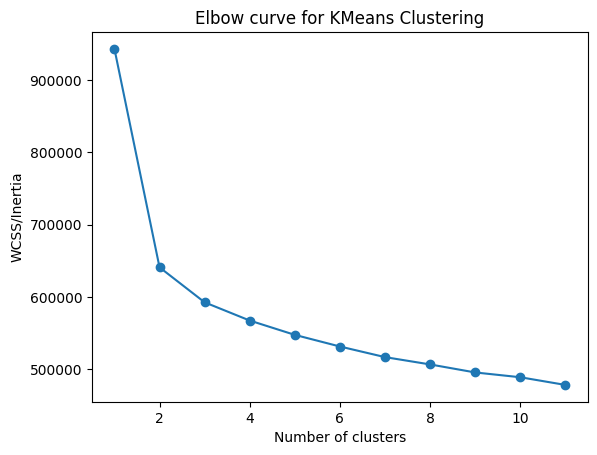

In [ ]:
plt.plot(range(1,12),inertia,'o-')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS/Inertia")
plt.title("Elbow curve for KMeans Clustering")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=123)
kmeans.fit(train)
train['Cluster']=kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Cluster'>

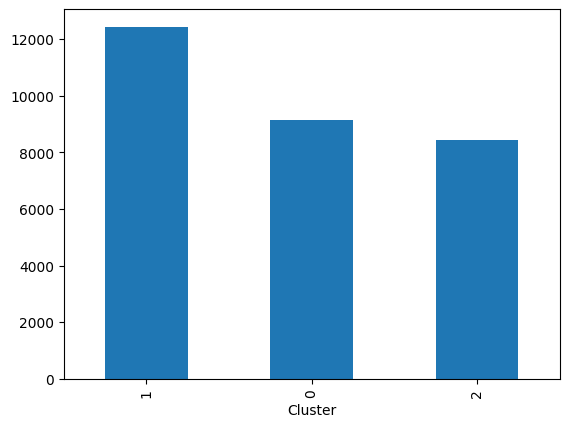

In [ ]:
train['Cluster'].value_counts().plot(kind='bar')

In [ ]:
average_purchases = train.groupby('Cluster').mean(numeric_only=True)
print(average_purchases)

           Gender    Orders    Jordan  Gatorade   Samsung      Asus      Udis  \
Cluster                                                                         
0        0.177476  8.751643  0.274759  0.273335  0.232362  0.172984  0.148883   
1        0.166533  0.607884  0.246822  0.218021  0.202655  0.146661  0.137329   
2        0.181474  4.460199  0.289860  0.280147  0.242597  0.170339  0.146885   

         Mondelez International  Wrangler      Vans  ...        LG      Dior  \
Cluster                                              ...                       
0                      0.141981  0.107143  0.116674  ...  0.101227  0.276621   
1                      0.132019  0.102574  0.105632  ...  0.109252  0.267096   
2                      0.148780  0.113125  0.114309  ...  0.094054  0.271144   

           Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
Cluster                                                                         
0        0.387489        0.1618

In [ ]:
kmeans.cluster_centers_

array([[0.1774759 , 8.7516433 , 0.27475898, 0.27333479, 0.23236196,
        0.17298422, 0.14888256, 0.14198072, 0.10714286, 0.11667397,
        0.08851884, 0.14986854, 0.3568142 , 0.20048203, 0.14986854,
        0.16750657, 0.10254163, 0.31660824, 0.05335232, 0.79382121,
        0.26358457, 0.45672656, 0.25985977, 0.12346626, 0.02826468,
        0.43525416, 0.12642419, 0.10122699, 0.27662138, 0.38748904,
        0.16180982, 0.07613935, 0.05554338, 0.19620947, 0.11985101,
        0.09158633, 0.06660824, 1.01555653],
       [0.16653258, 0.60788415, 0.2468222 , 0.21802092, 0.20265487,
        0.1466613 , 0.13732904, 0.13201931, 0.10257442, 0.10563154,
        0.10176991, 0.13467418, 0.29613837, 0.21850362, 0.13113435,
        0.15752212, 0.10514883, 0.26387772, 0.04408689, 0.7069992 ,
        0.23507643, 0.46645213, 0.24255833, 0.11681416, 0.03314562,
        0.40289622, 0.11536605, 0.10925181, 0.26709574, 0.35068383,
        0.15840708, 0.07377313, 0.05687852, 0.18809332, 0.10740145,
   

In [ ]:
kmeans.n_iter_

4

In [ ]:
print(silhouette_score(train, kmeans.fit_predict(train)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.2251101371897251
